In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# Load your data
df1 = pd.read_csv('C:/Users/User/Desktop/run12.csv')
df2 = pd.read_csv('C:/Users/User/Desktop/run19.csv')

df2=df2.dropna()
# # Drop duplicate rows
# df_unique = df.drop_duplicates()

# # Optionally, if you want to save the cleaned data back to a CSV
# df_unique.to_csv('path_to_your_cleaned_csv_file.csv', index=False)
df2.head()

,Unnamed: 0,Title,Channel,url
0,0,Viele der Straftäter sind Ausländer - das ist ...,SVP Schweiz,https://www.youtube.com/watch?v=BvxnaO-8GpE
10,10,Grusswort der SVP des Kantons Zürich | Kantona...,SVP Schweiz,https://www.youtube.com/watch?v=jDOjDHNy3ao
11,11,Grusswort der SVP des Kantons Zürich | Kantona...,SVP Schweiz,https://www.youtube.com/watch?v=jhr8DAGZXvQ
12,12,Grusswort der SVP des Kantons Zürich | Kantona...,SVP Schweiz,https://www.youtube.com/watch?v=jhr8DAGZXvQ
13,13,Grusswort der SVP des Kantons Zürich | Kantona...,SVP Schweiz,https://www.youtube.com/watch?v=jhr8DAGZXvQ


In [19]:
# Create a directed graph
G1 = nx.DiGraph()
G2 = nx.DiGraph()

# Assume 'Title' column holds the video titles; adjust if your column names differ
for i in range(len(df1) - 1):
    G1.add_edge(df1.iloc[i]['Channel'], df1.iloc[i+1]['Channel'])

for i in range(len(df2) - 1):
    G2.add_edge(df2.iloc[i]['Channel'], df2.iloc[i+1]['Channel'])


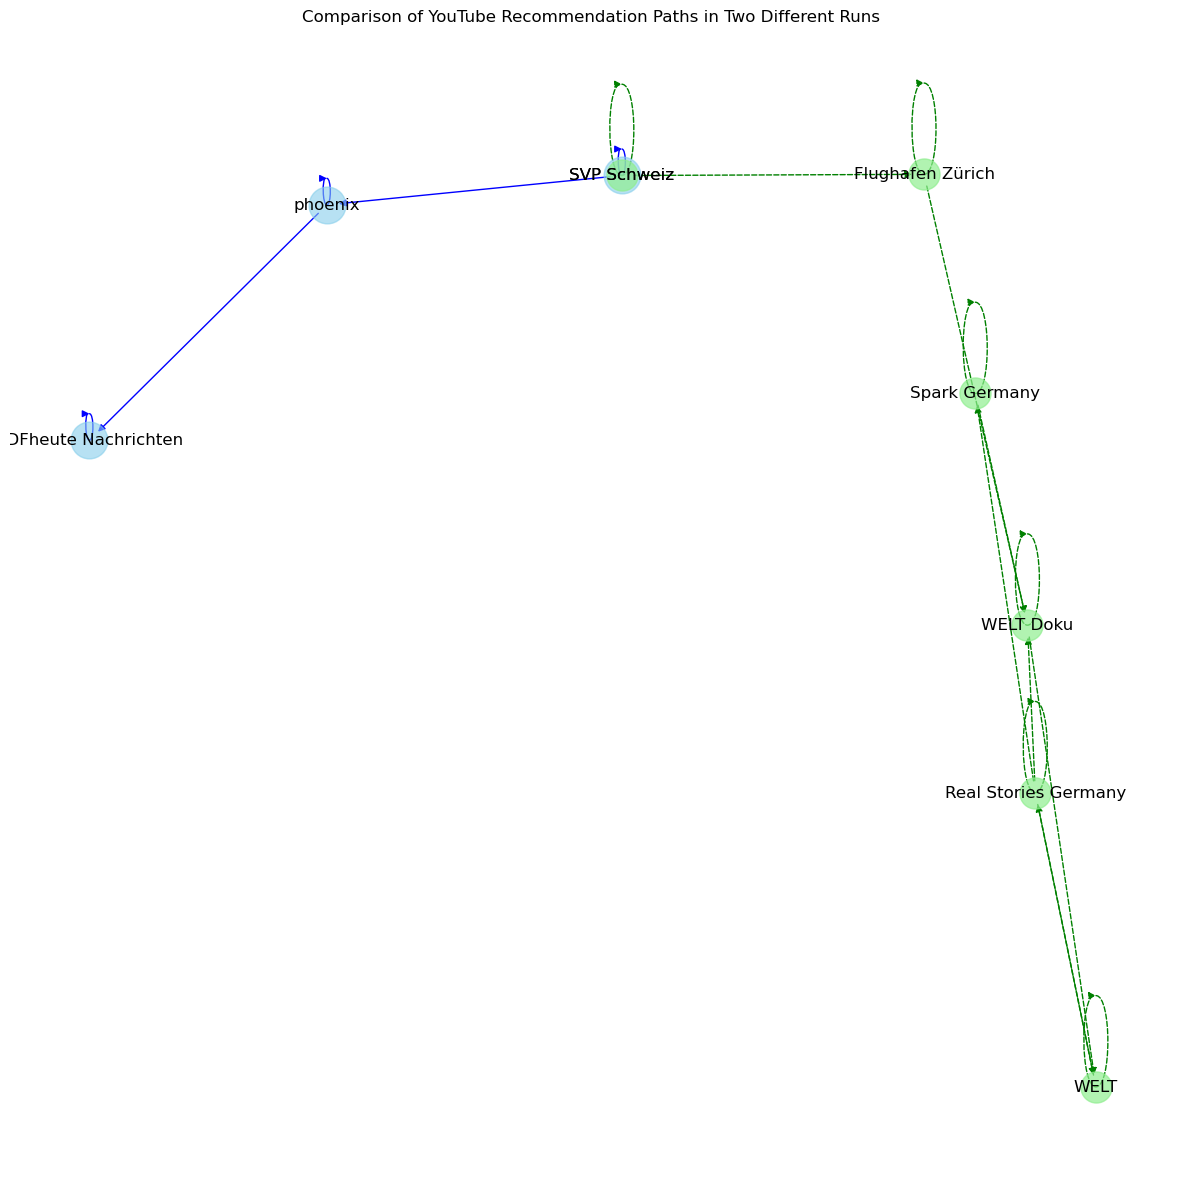

In [25]:

# Assuming df_run1 and df_run2 are already loaded and G1, G2 are created

# Combine both graphs for the layout calculation
combined_graph = nx.compose(G1, G2)

# Generate a layout based on all nodes in the combined graph
pos = nx.spring_layout(combined_graph)

# Now draw the graphs using the combined layout
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G1, pos, node_size=700, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G1, pos, edge_color='blue', style='solid')
nx.draw_networkx_labels(G1, pos, font_color='black')

nx.draw_networkx_nodes(G2, pos, node_size=500, node_color='lightgreen', alpha=0.7)
nx.draw_networkx_edges(G2, pos, edge_color='green', style='dashed')
nx.draw_networkx_labels(G2, pos, font_color='black')

plt.title('Comparison of YouTube Recommendation Paths in Two Different Runs')
plt.axis('off')
plt.show()


